<a href="https://colab.research.google.com/github/Arnob-Mitra/Advanced-Time-Series-Analysis-for-Cryptocurrency-Investment-using-Machine-Learning-Techniques/blob/main/Data_analysis_part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing necessary libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import correlate
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Reading and Cleaning the Data

In [ ]:
!git clone https://github.com/Es-Di-Bee/Crypto-Investment-Analysis.git

Cloning into 'Crypto-Investment-Analysis'...
remote: Enumerating objects: 38, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 38 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (38/38), done.


In [ ]:
crypto = {}  # putting data of all cryptos in dictionary format with crypto name as the "key"

crypto['aave'] = pd.read_csv('/content/Crypto-Investment-Analysis/Dataset/coin_Aave.csv', parse_dates=['Date']).drop(['SNo', 'Symbol'], axis=1)
crypto['binancecoin'] = pd.read_csv('/content/Crypto-Investment-Analysis/Dataset/coin_BinanceCoin.csv', parse_dates=['Date']).drop(['SNo', 'Symbol'], axis=1)
crypto['bitcoin'] = pd.read_csv('/content/Crypto-Investment-Analysis/Dataset/coin_Bitcoin.csv', parse_dates=['Date']).drop(['SNo', 'Symbol'], axis=1)
crypto['cardano'] = pd.read_csv('/content/Crypto-Investment-Analysis/Dataset/coin_Cardano.csv', parse_dates=['Date']).drop(['SNo', 'Symbol'], axis=1)
crypto['chainlink'] = pd.read_csv('/content/Crypto-Investment-Analysis/Dataset/coin_ChainLink.csv', parse_dates=['Date']).drop(['SNo', 'Symbol'], axis=1)
crypto['cosmos'] = pd.read_csv('/content/Crypto-Investment-Analysis/Dataset/coin_Cosmos.csv', parse_dates=['Date']).drop(['SNo', 'Symbol'], axis=1)
crypto['cryptocomcoin'] = pd.read_csv('/content/Crypto-Investment-Analysis/Dataset/coin_CryptocomCoin.csv', parse_dates=['Date']).drop(['SNo', 'Symbol'], axis=1)
crypto['dogecoin'] = pd.read_csv('/content/Crypto-Investment-Analysis/Dataset/coin_Dogecoin.csv', parse_dates=['Date']).drop(['SNo', 'Symbol'], axis=1)
crypto['eos'] = pd.read_csv('/content/Crypto-Investment-Analysis/Dataset/coin_EOS.csv', parse_dates=['Date']).drop(['SNo', 'Symbol'], axis=1)
crypto['ethereum'] = pd.read_csv('/content/Crypto-Investment-Analysis/Dataset/coin_Ethereum.csv', parse_dates=['Date']).drop(['SNo', 'Symbol'], axis=1)
crypto['lota'] = pd.read_csv('/content/Crypto-Investment-Analysis/Dataset/coin_Iota.csv', parse_dates=['Date']).drop(['SNo', 'Symbol'], axis=1)
crypto['litecoin'] = pd.read_csv('/content/Crypto-Investment-Analysis/Dataset/coin_Litecoin.csv', parse_dates=['Date']).drop(['SNo', 'Symbol'], axis=1)
crypto['monero'] = pd.read_csv('/content/Crypto-Investment-Analysis/Dataset/coin_Monero.csv', parse_dates=['Date']).drop(['SNo', 'Symbol'], axis=1)
crypto['nem'] = pd.read_csv('/content/Crypto-Investment-Analysis/Dataset/coin_NEM.csv', parse_dates=['Date']).drop(['SNo', 'Symbol'], axis=1)
crypto['polkadot'] = pd.read_csv('/content/Crypto-Investment-Analysis/Dataset/coin_Polkadot.csv', parse_dates=['Date']).drop(['SNo', 'Symbol'], axis=1)
crypto['solana'] = pd.read_csv('/content/Crypto-Investment-Analysis/Dataset/coin_Solana.csv', parse_dates=['Date']).drop(['SNo', 'Symbol'], axis=1)
crypto['stellar'] = pd.read_csv('/content/Crypto-Investment-Analysis/Dataset/coin_Stellar.csv', parse_dates=['Date']).drop(['SNo', 'Symbol'], axis=1)
crypto['tether'] = pd.read_csv('/content/Crypto-Investment-Analysis/Dataset/coin_Tether.csv', parse_dates=['Date']).drop(['SNo', 'Symbol'], axis=1)
crypto['tron'] = pd.read_csv('/content/Crypto-Investment-Analysis/Dataset/coin_Tron.csv', parse_dates=['Date']).drop(['SNo', 'Symbol'], axis=1)
crypto['usdcoin'] = pd.read_csv('/content/Crypto-Investment-Analysis/Dataset/coin_USDCoin.csv', parse_dates=['Date']).drop(['SNo', 'Symbol'], axis=1)
crypto['uniswap'] = pd.read_csv('/content/Crypto-Investment-Analysis/Dataset/coin_Uniswap.csv', parse_dates=['Date']).drop(['SNo', 'Symbol'], axis=1)
crypto['wrappedbitcoin'] = pd.read_csv('/content/Crypto-Investment-Analysis/Dataset/coin_WrappedBitcoin.csv', parse_dates=['Date']).drop(['SNo', 'Symbol'], axis=1)
crypto['xrp'] = pd.read_csv('/content/Crypto-Investment-Analysis/Dataset/coin_XRP.csv', parse_dates=['Date']).drop(['SNo', 'Symbol'], axis=1)

# Data Exploration and Analysis

Reformating the Date column to erase the time information

In [ ]:
for k, v in crypto.items():
  v['Date'] = v['Date'].dt.strftime('%Y-%m-%d')

Finding out How many data are there for each cryptocurrency

In [ ]:
for k, v in crypto.items():
  print(k, 'has', v.shape[0], 'entries')

aave has 275 entries
binancecoin has 1442 entries
bitcoin has 2991 entries
cardano has 1374 entries
chainlink has 1385 entries
cosmos has 845 entries
cryptocomcoin has 935 entries
dogecoin has 2760 entries
eos has 1466 entries
ethereum has 2160 entries
lota has 1484 entries
litecoin has 2991 entries
monero has 2602 entries
nem has 2288 entries
polkadot has 320 entries
solana has 452 entries
stellar has 2527 entries
tether has 2318 entries
tron has 1392 entries
usdcoin has 1002 entries
uniswap has 292 entries
wrappedbitcoin has 888 entries
xrp has 2893 entries


**Let us now find out what type of correlation exists among the different cryptos**

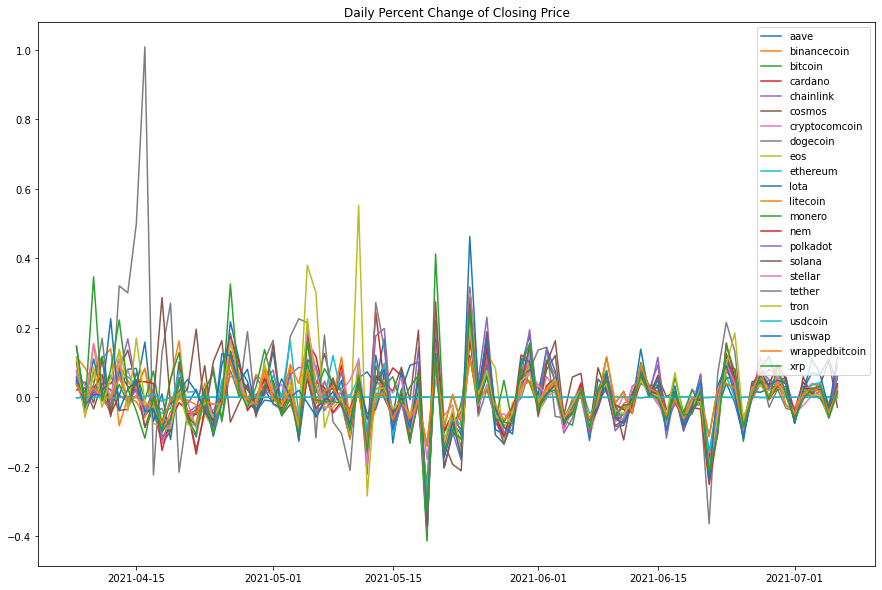

In [ ]:
plt.figure(figsize=(15,10))

cryptoMain = {}  # for backing up the main data, just in case

# for our convenience, we will take into consideration only the ""daily percent change of closing price""" of different cryptos

for coin in crypto:
    cryptoMain[coin] = crypto[coin]
    crypto[coin] = crypto[coin][-500:]  # we will work with the most recent 1.5 year's data of each crypto

    crypto[coin]['Date'] = pd.to_datetime(crypto[coin]['Date'])  # The data columns is
    crypto[coin].sort_values('Date', inplace=True)               # converted, sorted and 
    crypto[coin].set_index(crypto[coin]['Date'], inplace=True)   # made index 
    crypto[coin].drop('Date', 1, inplace=True)                   # of the dataframe

    crypto[coin]['ClosePctChange'] = crypto[coin]['Close'].pct_change().fillna(0)  # a new column is created for calculating the percent change


for coin in crypto:
    plt.plot(crypto[coin]['ClosePctChange'][-90:], label=coin)     # selecting only most recent 3 month's data for better visualization             


plt.legend(loc=1)
plt.title('Daily Percent Change of Closing Price')
plt.show()

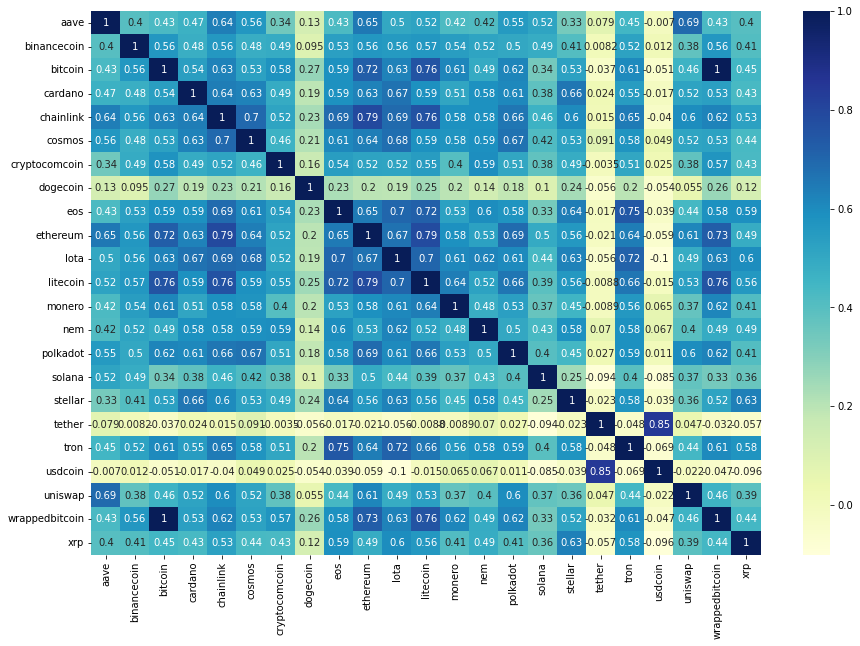

In [ ]:
plt.figure(figsize=(15,10))

corr_df = pd.DataFrame()

for coin in crypto:                                    # taking the CLosePctChange column
    corr_df[coin] = crypto[coin]['ClosePctChange']     # from every cryptocurrency data

sns.heatmap(corr_df.corr(), cmap='YlGnBu', annot=True)  # plotting the heatmap

**Now, we will find the volatility of market cap for each crypto**

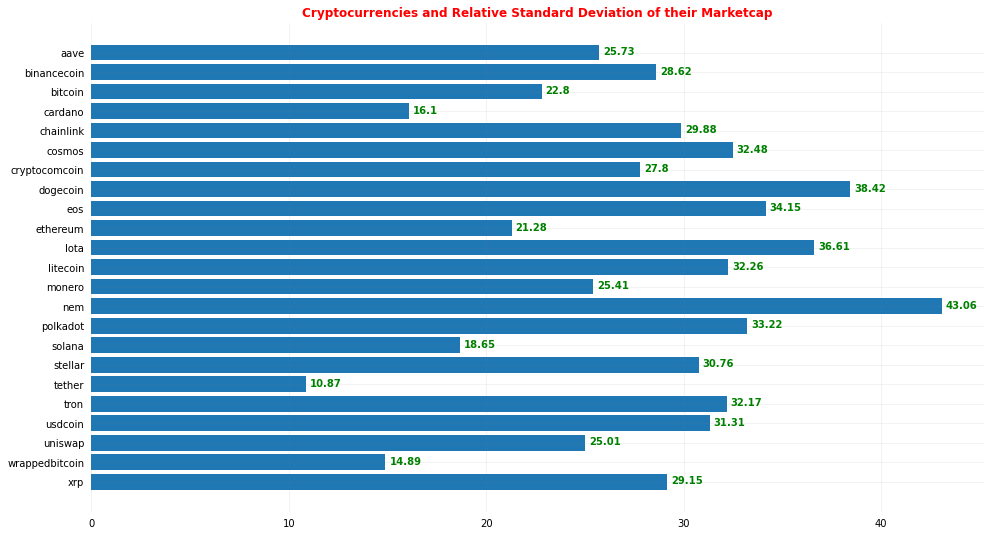

In [ ]:
dict_for_plotting = {}

# we are working with most recent 90 values, because crypto price has changed a lot since 4-5 years
for coin in crypto:
     dict_for_plotting[coin] = ( np.std(crypto[coin]['Marketcap'][-90:]) / np.mean(crypto[coin]['Marketcap'][-90:]) ) * 100 

currencies = list(dict_for_plotting.keys())
values = list(dict_for_plotting.values())

fig, ax = plt.subplots(figsize =(16, 9))

ax.barh(currencies, values)  # horizontal plotting
 
for s in ['top', 'bottom', 'left', 'right']:    # border lines 
    ax.spines[s].set_visible(False)             # are removed
 
ax.xaxis.set_ticks_position('none')    # removing dash between 
ax.yaxis.set_ticks_position('none')    # currency name and value
 
ax.grid(b = True, color ='grey', linestyle ='-', linewidth = 0.5, alpha = 0.2)   # adding '-' gridlines 
ax.invert_yaxis()  # top values are shown
 
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5, str(round((i.get_width()), 2)),     # adding annotation
             fontsize = 10, fontweight ='bold', color ='green')                    # to the bars
 
ax.set_title('Cryptocurrencies and Relative Standard Deviation of their Marketcap', loc ='center', fontweight='bold', color='red')   # setting the title of the graph
 
plt.show()

In [ ]:
crypto['dogecoin']['Name']

Date
2020-02-23    Dogecoin
2020-02-24    Dogecoin
2020-02-25    Dogecoin
2020-02-26    Dogecoin
2020-02-27    Dogecoin
                ...   
2021-07-02    Dogecoin
2021-07-03    Dogecoin
2021-07-04    Dogecoin
2021-07-05    Dogecoin
2021-07-06    Dogecoin
Name: Name, Length: 500, dtype: object